In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
init_df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')


In [4]:
print(init_df.info())
print(init_df.columns)
#print(df.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None
Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')


In [5]:
# 출고량에 k m 이 몇개나 붙어있는지 확인해 보자. 
def countKM(string):
  char = string[-1]
  return char

mc=0
kc=0

for x in init_df['NA_Sales']:
  if x[-1]=='K':
    #print(x)
    kc+=1
  elif x[-1]=="M":
    #print(x)
    mc+=1
print(mc,kc)

100 100


In [6]:
# 출고량은 기본단위를 million 단위로 k 가 붙은 값만 thousand 단위로 하자. 

def toInt(str):
  if str[-1]=='K':   
    return float(str[0:-1])*1000
  elif str[-1]=="M":
    return float(str[0:-1])*1000000
  else:
    return float(str)*1000000

# init_df.loc[:,'NA_Sales':'Other_Sales'].apply(toInt) 왜 안될까. dataFrame 인데...
init_df['NA_Sales'] = init_df['NA_Sales'].apply(toInt)

init_df['EU_Sales'] = init_df['EU_Sales'].apply(toInt)

init_df['JP_Sales'] = init_df['JP_Sales'].apply(toInt)

init_df['Other_Sales'] = init_df['Other_Sales'].apply(toInt)




In [7]:
print(init_df[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].isnull().sum())

NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [8]:
init_df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


In [9]:
#연도를 통일해보자. 
#Year 년도, 어떻게 생겼는지 확인. 
'''
0은 00년인가. 1은 2001년인가.
'''
lis = init_df['Year'].unique()
lis.sort()
# print(lis[20:30])
# print(lis[0:19])
# print(len(lis))
print(init_df['Year'].isnull().sum())

timetable = init_df['Year'].value_counts()
timetable.sort_index(inplace=True)

print(timetable.index)


271
Float64Index([   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,    9.0,   10.0,   11.0,   12.0,   13.0,   14.0,   15.0,
                16.0,   86.0,   94.0,   95.0,   96.0,   97.0,   98.0, 1980.0,
              1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0,
              1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0,
              1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
              2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0,
              2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0],
             dtype='float64')


In [10]:
# Year. 형식 통일  
def toYear(flo):
  if flo == None:
    return None
  elif flo >=0 and flo < 17:
    return 2000+flo
  elif flo < 100:
    return 1900 + flo
  else:
    return flo

test = init_df['Year']
test = test.apply(toYear)

In [11]:
# Year 형식 통일 확인
print(test.isnull().sum())
test.value_counts()
init_df['Year'] = test


271


작업 끝.
여기까지가 pre_processing일까. 평칭이 뭘까.
요구사항을 하나씩 수행해보자. 

지역에 따라 선호하는 게임이 다를까?
이름이 중복된 게임은 연도가 다를 것이다. 맞지 ? 맞지? 

In [12]:
#게임 이름이 동일한 것이 많구나. 동일 게임일까? 회사가 다를까 ?
x = init_df['Name'].value_counts()
print(len(x))
print(x.value_counts())


11493
1     8718
2     1502
3      710
4      283
5      142
6       88
7       32
8       13
9        4
12       1
Name: Name, dtype: int64


In [13]:
# 동일한게임명, 회사가 같은지 다른지 확인해보자
temp = init_df['Name'].value_counts() 
temp.sort_index()
print(temp[5:11])
# Need for Speed: Most Wanted 를 선택
tdf = init_df[init_df['Name']=='Monopoly']
print(tdf['Publisher'])

Monopoly                        8
The LEGO Movie Videogame        8
FIFA 15                         8
Terraria                        8
LEGO Harry Potter: Years 5-7    8
Angry Birds Star Wars           8
Name: Name, dtype: int64
1772        Electronic Arts
2263     Hasbro Interactive
4445        Electronic Arts
9249        Electronic Arts
9685     Hasbro Interactive
11219       Electronic Arts
15835    Hasbro Interactive
16521       Electronic Arts
Name: Publisher, dtype: object


이름이 같다고 동일한 게임이 아니다. Publisher가 다를 수 있구나

(unKnown은 하나로 봐도 크게 의미 없을듯)


지역별로 선호는 게임 장르가 다를 까를 진행하고 있다. 

1. *tidy _data가 필요하다 groupby를 두개의 column으로 수행 할 수 있을까?*
1. 너 틀렸어 : tidy_ data 는 필요 없어 어차피 장르별이기 때문에 이름이 같은 게임이 동일 게임이지 아닌지는 분류 할 필요가 없어. 필요 없는 수준가지 pre-processing? 할뻔.


In [14]:
#데이터 프레임의 한 컬럼의 unique 변수를 기준으로 다른 컬럼들은 sum() 값을 갖도록 하는 방법이 있을것 같은데. 모르겠다. 
#그것이 groupby -> .sum()이여

In [15]:
#test : groupby 연습.
dff = pd.DataFrame({'name':['a','a','b','c'], 'won':[1,1,1,1], 'dal':[3,3,3,3]})
x = dff.groupby('name')
print(x.sum())



      won  dal
name          
a       2    6
b       1    3
c       1    3


In [16]:
df_1 = init_df[['Genre', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']]
temp = df_1.groupby('Genre')
groupby_genre = temp.sum()


groupby_genre.sort_values(by='NA_Sales',inplace=True)
print(groupby_genre.sum())

NA_Sales       4.372340e+09
EU_Sales       2.421010e+09
JP_Sales       1.278140e+09
Other_Sales    7.922100e+08
dtype: float64


In [17]:
import matplotlib.pyplot as plt

In [18]:
#장르별 퍼센테이지를 구할겁니다.
# 지역펼 판매 합을 구하고. 각 샐을 그것으로 나누어서 퍼센테이지를 구하려고 합니다. 다른 기능을 못찾겠네요

gg = groupby_genre
each_total = gg.sum()

for t in ['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']:
  gg[t] = gg[t]/each_total[t]


In [19]:
print(gg)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Strategy      0.015712  0.018719  0.038697     0.014340
Adventure     0.024166  0.026456  0.040645     0.021219
Puzzle        0.028211  0.020954  0.044494     0.015804
Simulation    0.041845  0.046819  0.049838     0.039737
Fighting      0.051048  0.041809  0.068334     0.046250
Role-Playing  0.073082  0.075828  0.269884     0.071900
Racing        0.081693  0.097934  0.044127     0.097323
Misc          0.093325  0.087715  0.082362     0.093460
Platform      0.102106  0.083275  0.102219     0.065046
Shooter       0.133091  0.129306  0.029950     0.129574
Sports        0.155642  0.155505  0.105912     0.169993
Action        0.200078  0.215679  0.123539     0.235354


Text(0.5, 1.0, 'Other')

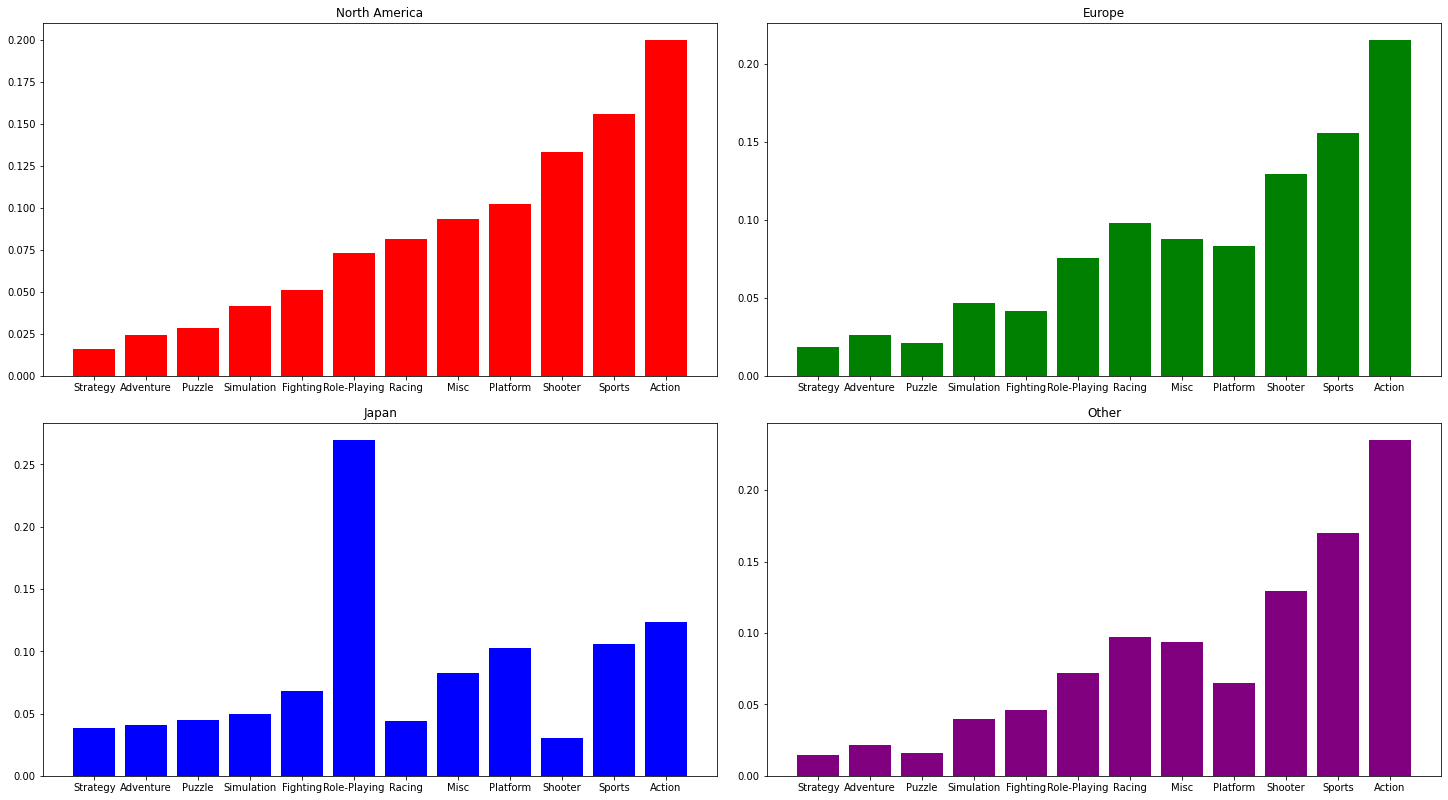

In [20]:
import seaborn as sns


fig = plt.figure(constrained_layout=True, figsize=(20,11))
ax = fig.subplots(2, 2, squeeze=False)


ax[0, 0].bar(gg.index, gg['NA_Sales'], color='red')
ax[0, 1].bar(gg.index, gg['EU_Sales'], color='green')
ax[1, 0].bar(gg.index, gg['JP_Sales'], color='blue')
ax[1, 1].bar(gg.index, gg['Other_Sales'], color='purple')

ax[0, 0].set_title("North America")
ax[0, 1].set_title("Europe")
ax[1, 0].set_title("Japan")
ax[1, 1].set_title("Other")

지역에 따라 선호하는 게임의 장르가 다릅니다. 일본 !
일본을 빼고 chisquare 테스트를 해서,  p-value: 0

분포가 통개적으로 의미 비슷하다고 할 수 없다.

이쁘게 하는 건 다 완료하고 나서 하자. 

 이제 .Transpose해야 할까? 
chisquare test를 통해 , 지역에 따라 분포가 다름을 증명해야 할듯.

> 들여쓴 블록



In [21]:
from scipy.stats import chi2_contingency
#스케일을 맞춰주고 해야 하나? 머리아프구만. 
chi2 = chi2_contingency(gg.T)
# null_H : 
print(chi2)


(0.44854115375658643, 1.0, 33, array([[0.02186709, 0.02812139, 0.02736593, 0.04455979, 0.0518603 ,
        0.12267362, 0.08026918, 0.08921568, 0.08816135, 0.10548019,
        0.14676298, 0.19366249],
       [0.02186709, 0.02812139, 0.02736593, 0.04455979, 0.0518603 ,
        0.12267362, 0.08026918, 0.08921568, 0.08816135, 0.10548019,
        0.14676298, 0.19366249],
       [0.02186709, 0.02812139, 0.02736593, 0.04455979, 0.0518603 ,
        0.12267362, 0.08026918, 0.08921568, 0.08816135, 0.10548019,
        0.14676298, 0.19366249],
       [0.02186709, 0.02812139, 0.02736593, 0.04455979, 0.0518603 ,
        0.12267362, 0.08026918, 0.08921568, 0.08816135, 0.10548019,
        0.14676298, 0.19366249]]))


어떻게 p value가 1이 나오지? 분포가 동일하지 않은게 1개 있는데 .. 

연도별 게임 트랜드... 어쩌지

어떤 플랫폼이. 

어떤 회사가

어떤 장르가..

다 하긴 시간이 걸리기 때문에 일단 어떤 장르가 어떤년도에 어느정도 판매량을 기록 했는지 알아보자. 
연도별 트렌드 이기 때문에 총량 보다는 차지 비율을 표시하는 것이 좋겠어. 

In [22]:
# Year 의 결측치는 제거합니다. 미미한정도일 것 같아요. 
#연도별 게임이 몇개나 출시 됐는지 확인 합니다. 
df_2 = init_df.dropna()
#print(df_2.info())
print(df_2['Year'].isnull().sum())

df_2['Year'].value_counts()

0


2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [23]:
# ctdf = pd.crosstab(index=df_1['Year'], columns=df_1['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'])
# print(ctdf)
df_2['T_Sales'] = df_2['NA_Sales']+df_2['EU_Sales']+df_2['JP_Sales']+df_2['Other_Sales']
print(df_2.columns)
df_2 = df_2[['Year', 'Genre', 'T_Sales']]
print(df_2)


Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'T_Sales'],
      dtype='object')
         Year      Genre   T_Sales
0      2008.0     Action   40000.0
1      2009.0     Action  180000.0
2      2010.0  Adventure   20000.0
3      2010.0       Misc   40000.0
4      2010.0   Platform  250000.0
...       ...        ...       ...
16593  2006.0   Platform  200000.0
16594  2005.0     Action   10000.0
16595  2015.0     Sports  790000.0
16596  2013.0     Action  380000.0
16597  1996.0   Fighting  170000.0

[16241 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
import numpy as np
# df_2c = pd.crosstab(index=df_2['Year'], columns=df_2['Genre'], values=df_2['T_Sales'].sum())
# print(df_2c)

df_2p = pd.pivot_table(df_2, values='T_Sales', index=['Year'],columns=['Genre'], aggfunc=np.sum)


<function matplotlib.pyplot.show>

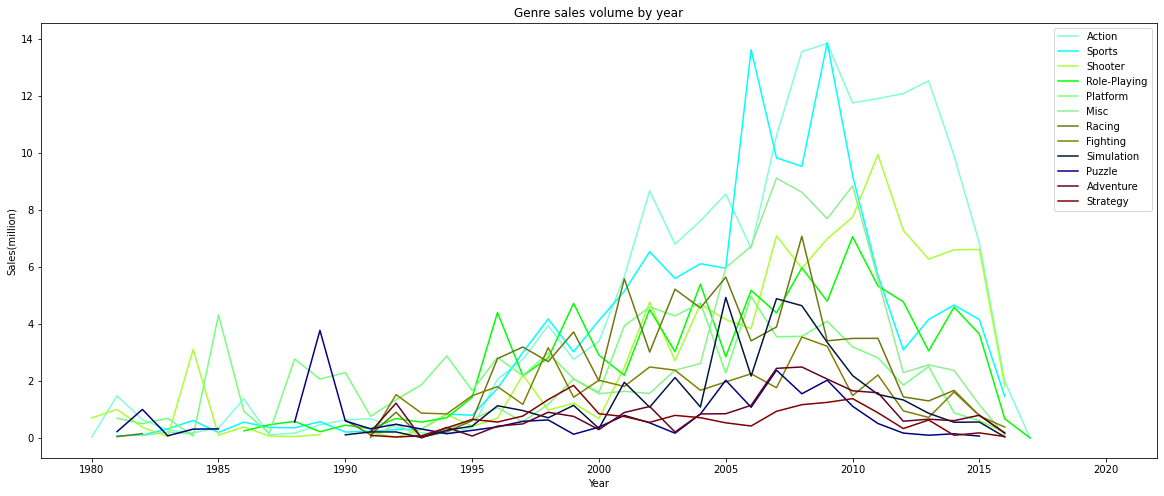

In [25]:

#sns.lineplot(data=df_2p)
ss = ['Strategy', 'Adventure', 'Puzzle', 'Simulation', 'Fighting', 'Racing', 'Misc', 'Platform', 'Role-Playing', 'Shooter', 'Sports', 'Action']
colors= ['#800000','#650021','#000080','#01153E','#808000','#6E750E','#90EE90','#76FF7B','#00FF00','#AAFF32','#00FFFF','#7FFFD4']
ss.reverse()
colors.reverse()


idx=0
plt.figure(figsize=(20,8))
plt.title('Genre sales volume by year')

for x in ss:
  plt.plot(df_2p[x].index, df_2p[x]/10000000, colors[idx], label =x)
  idx+=1
  
plt.legend()
plt.xlabel("Year")
plt.ylabel("Sales(million)")

plt.show




연도별로 선호도는게임은 달라진다. 
동글뱅이를 그려서 위에 3개 아래 3개, 아니면 차이가 많이 나면 위에 한게 아래 한개 정도 
설명을 하면서 이야기 하면 될 것  같아. 


In [26]:
'''
출고량이 높은 게임에 대한 분석 및 시각화 프로세스

출고량이 높은 게임은, 개발사와 게임이름이 같은 것을 합쳐서. 
데이터를 만들고 

출고량 탑 20 를 만들고, 어떤플랫폼이 비율이 높은지. 어떤장르가 많은지, 어느지역에서 많이 판매 됐는지. 제작사는 어디인지 이렇게 4가지 분석을 해보면 되겠다. 
'''

'\n출고량이 높은 게임에 대한 분석 및 시각화 프로세스\n\n출고량이 높은 게임은, 개발사와 게임이름이 같은 것을 합쳐서. \n데이터를 만들고 \n\n출고량 탑 20 를 만들고, 어떤플랫폼이 비율이 높은지. 어떤장르가 많은지, 어느지역에서 많이 판매 됐는지. 제작사는 어디인지 이렇게 4가지 분석을 해보면 되겠다. \n'

In [27]:
# 게임을 출고량 단위로 보려면, 동일한 게임을 하나로 묶어야 겠지 ? tidy data 인가 . 
#1. year 제거. 
df_3 = init_df.drop(columns=['Year','Unnamed: 0'])

In [28]:
#이름이 같은 동일게임 연도다른경우 => 통합
#이름이 같음 다른출판사의 게임 => 분리.
grouped_3 = df_3.groupby(['Name', 'Publisher'])
df_3=grouped_3.sum()
df_3.columns
print(df_3.head(10))

                                                                NA_Sales  ...  Other_Sales
Name                                        Publisher                     ...             
'98 Koshien                                 Magical Company     150000.0  ...      30000.0
.hack//G.U. Vol.1//Rebirth                  Namco Bandai Games       0.0  ...          0.0
.hack//G.U. Vol.2//Reminisce                Namco Bandai Games  110000.0  ...      30000.0
.hack//G.U. Vol.2//Reminisce (jp sales)     Namco Bandai Games       0.0  ...          0.0
.hack//G.U. Vol.3//Redemption               Namco Bandai Games       0.0  ...          0.0
.hack//Infection Part 1                     Atari               490000.0  ...     130000.0
.hack//Link                                 Namco Bandai Games       0.0  ...          0.0
.hack//Mutation Part 2                      Atari               230000.0  ...      60000.0
.hack//Outbreak Part 3                      Atari               140000.0  ...      40000.0

In [29]:
#탑 100 판매량 (게임명, 플랫폼, , 출판사 )가져오기.  이렇게 한 이유는 platform에 상관 없이 종합적인 게임 판매 량으로 순위를 정하기 위해서. 
#여기서 한계는.. 나의 한계는.. 게임이 1,2,3 시리즈로 나온경우,
df_3['T_Sales'] = df_3['NA_Sales']+df_3['EU_Sales']+df_3['JP_Sales']+df_3['Other_Sales']

In [30]:
df_3.sort_values(by='T_Sales',inplace=True)

In [44]:
ttt = df_3.sort_values(by='T_Sales', ascending = False)
ttt

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,T_Sales
Name,Publisher,,,,,
Wii Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Grand Theft Auto V,Take-Two Interactive,23460000.0,23040000.0,1390000.0,8030000.0,55920000.0
Super Mario Bros.,Nintendo,32480000.0,4880000.0,6960000.0,990000.0,45310000.0
Tetris,Nintendo,26170000.0,2950000.0,6030000.0,690000.0,35840000.0
Mario Kart Wii,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
...,...,...,...,...,...,...
Mega Brain Boost,Majesco Entertainment,10000.0,0.0,0.0,0.0,10000.0
Rock N' Roll Racing,Interplay,0.0,0.0,10000.0,0.0,10000.0
Football Academy,Electronic Arts,0.0,10000.0,0.0,0.0,10000.0


In [31]:
top100 = df_3.iloc[-100:-1].index
top100_name = []
top100_publ = []
for name, publisher in top100:
  top100_name.append(name)
  top100_publ.append(publisher)

print('done')
#이름, 출판사 추출 완료.   

done


In [32]:
#이제 , name과 publisher를 동시에 만족하는 컬럼만 남기면 된다. 
df_4 = init_df.loc[init_df['Name'].isin(top100_name) & init_df['Publisher'].isin(top100_publ)]
df_4.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [33]:
top_platform = df_4['Platform'].value_counts()
top_genre = df_4['Genre'].value_counts()
top_genre

Action          73
Shooter         60
Sports          51
Racing          30
Role-Playing    22
Misc            18
Platform        18
Simulation       8
Puzzle           5
Adventure        4
Fighting         3
Name: Genre, dtype: int64

['X360', 'PS3', 'PC', 'Wii', 'DS', 'PS2', 'XOne', 'PS4', '3DS', 'WiiU', 'GB', 'GBA', 'PSP', 'PSV', 'NES', 'XB', 'N64', 'SNES', 'GC', 'PS']
[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 0.98, 'Categorical Plotting')

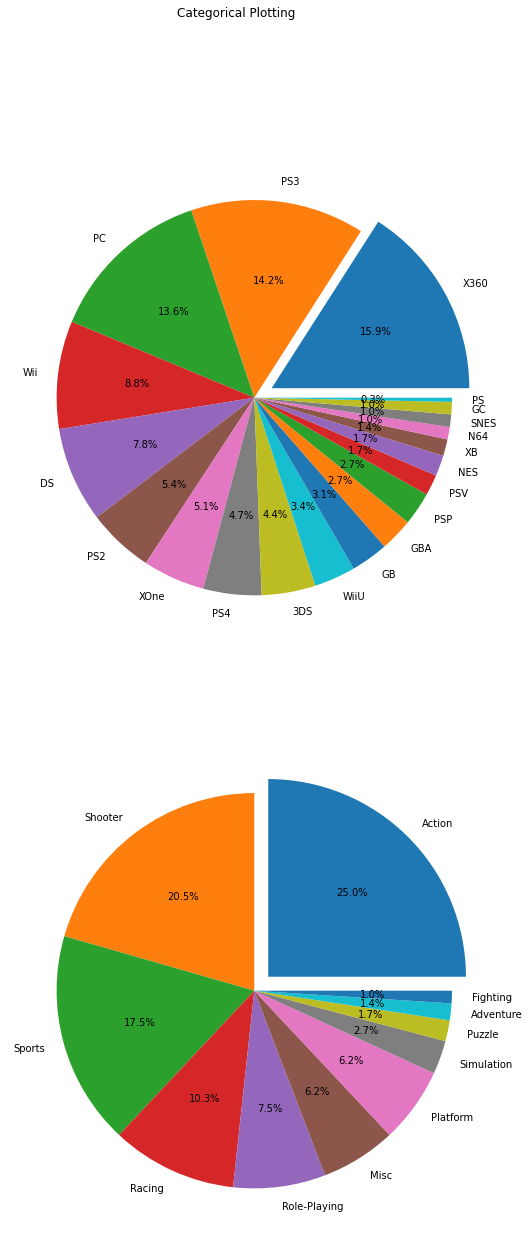

In [34]:
label1 = top_platform.index.to_list()
print(label1)
explode = [0]*len(label1)
explode[0] = 0.1
explode2 = [0]*len(top_genre)
explode2[0] = 0.1
print(explode2)

fig, axs = plt.subplots(2, figsize=(20, 20), sharey=True)
axs[0].pie(top_platform, labels = top_platform.index, autopct='%1.1f%%', explode = explode)
axs[1].pie(top_genre, labels = top_genre.index, autopct='%1.1f%%', explode = explode2)


fig.suptitle('Categorical Plotting')

In [39]:

x = ['Strategy', 'Adventure', 'Puzzle', 'Simulation', 'Fighting', 'Racing', 'Misc', 'Platform', 'Role-Playing', 'Shooter', 'Sports', 'Action']
x.reverse()
x

['Action',
 'Sports',
 'Shooter',
 'Role-Playing',
 'Platform',
 'Misc',
 'Racing',
 'Fighting',
 'Simulation',
 'Puzzle',
 'Adventure',
 'Strategy']